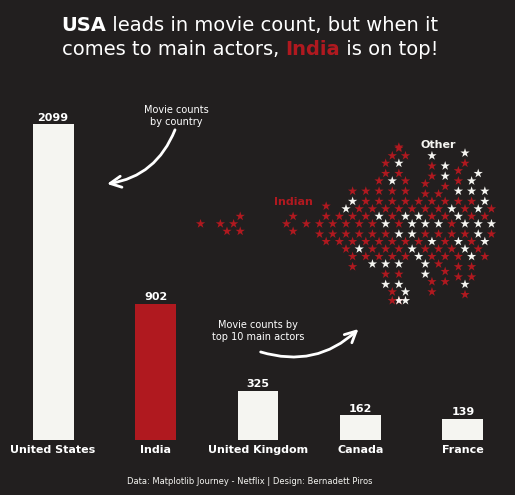

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from highlight_text import fig_text
from drawarrow import ax_arrow, fig_arrow

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/netflix/netflix.csv"
df = pd.read_csv(url)

df["release_year"].astype(int)
df["main_cast"] = df["cast"].str.split(",").str[0]
df["main_country"] = df["country"].str.split(",").str[0]

top_main_cast=df["main_cast"].value_counts().sort_values(ascending=False)[:10]
top_main_cast_list=top_main_cast.index.tolist()
top_main_cast_df=df[df["main_cast"].isin(top_main_cast_list)]

df["count"]=1
grouped_df = df.groupby('main_country')['count'].sum().sort_values(ascending=False)[:5].reset_index()

color_mapping = {}
for country in top_main_cast_df.main_country:
    if country=="India":
        color = "#b0191f"
    else:
        color = "#f5f5f1"
    color_mapping[country] = color     

country_colors = top_main_cast_df["main_country"].map(color_mapping)

fig, ax = plt.subplots()
plt.subplots_adjust(top=0.8)

text_style=dict(size=8, weight="bold", ha="center")

for i, row in grouped_df.iterrows():
    x_value = row["main_country"]
    y_value = row["count"]
    country = row["main_country"]
    s = row["count"]
    color = "#b0191f"if country == "India" else "#f5f5f1"
    ax.bar(x_value, y_value, width=0.4, color=color)
    ax.text(x_value, y_value + 30, s=s, color="white",
            **text_style)   

ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.tick_params(length=0, labelsize=8, labelcolor="white")
ax.set_yticks([])

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight("bold")
    
ax.set_facecolor("#221f1f")
fig.set_facecolor("#221f1f")
        
inset_ax = fig.add_axes([0.4, 0.36, 0.5, 0.4])  

sns.swarmplot(data=top_main_cast_df, x="release_year", hue=country_colors,
              palette={"#b0191f": "#b0191f", "#f5f5f1": "#f5f5f1"}, size=7,
              marker="*", orient="h", legend=False, ax=inset_ax) 

inset_ax.text(2012, -0.4, "Other", color="#f5f5f1", **text_style)
inset_ax.text(1990, -0.1, "Indian", color="#b0191f", **text_style)

inset_ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
inset_ax.tick_params(length=0)
inset_ax.set_xticks([])
inset_ax.set_yticks([])
inset_ax.set_xlabel("")  
inset_ax.set_facecolor("#221f1f")

fig_text(0.5, 0.95, "<USA> leads in movie count, but when it\ncomes to main actors, <India> is on top!",
        size=14, color="white", ha="center", va="center",
        highlight_textprops=[
            {"weight":"bold"},
            {"color":"#b0191f", "weight":"bold"}]
        )

ax.text(1.2, 2100, "Movie counts\nby country", color="white", size=7, ha="center")
ax_arrow([1.2, 2080], [0.5, 1700], fill_head=False, color="white", width=2, radius=-0.3, ax=ax)

ax.text(2, 670, "Movie counts by\ntop 10 main actors", color="white", size=7, ha="center")
ax_arrow([2, 590], [3, 750], fill_head=False, color="white", width=2, radius=0.3, ax=ax)

fig.text(0.5, 0.02, "Data: Matplotlib Journey - Netflix | Design: Bernadett Piros",
         size=6, ha="center", color="#f5f5f1")

plt.show()

#plt.savefig("inset_axes_netflix", dpi=300, bbox_inches='tight', pad_inches=0.2)